**EURO Stoxx 50 Clustering using K-Means Algorithm based on Return and Volatility**

In [91]:
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as web
from math import sqrt
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from pylab import plot,show

In [3]:
#ticker list from wikipedia
ES50_url = 'https://en.wikipedia.org/wiki/EURO_STOXX_50'

In [4]:
#read in the url and scrape ticker data
data_table = pd.read_html(ES50_url)

In [7]:
data_table

[                  0                                 1
 0        Foundation                  26 February 1998
 1          Operator                             STOXX
 2      Constituents                                50
 3              Type                          Mega cap
 4        Market cap   €3.698 trillion (April 2021)[1]
 5  Weighting method  Free-float market capitalization
 6   Related indices                   STOXX Europe 50
 7           Website                         stoxx.com,
     Year  Year endvalue Change,in points Change,in %
 0   1986         900.82              NaN         NaN
 1   1987         648.13          −252.69      −28.05
 2   1988         861.36           213.23       32.90
 3   1989        1098.49           237.13       27.53
 4   1990         858.72          −239.77      −21.83
 5   1991        1000.00           141.28       16.45
 6   1992        1033.51            33.51        3.35
 7   1993        1433.34           399.83       38.69
 8   1994        1

In [50]:
tickers = data_table[2]['Ticker'].tolist()

In [51]:
tickers

['ADS.DE',
 'ADYEN.AS',
 'AD.AS',
 'AI.PA',
 'AIR.PA',
 'ALV.DE',
 'AMS.MC',
 'ABI.BR',
 'ASML.AS',
 'CS.PA',
 'BAS.DE',
 'BAYN.DE',
 'SAN.MC',
 'BMW.DE',
 'BNP.PA',
 'CRG.IR',
 'DAI.DE',
 'BN.PA',
 'DB1.DE',
 'DPW.DE',
 'DTE.DE',
 'ENEL.MI',
 'ENGI.PA',
 'ENI.MI',
 'EL.PA',
 'FLTR.IR',
 'IBE.MC',
 'ITX.MC',
 'IFX.DE',
 'INGA.AS',
 'ISP.MI',
 'KER.PA',
 'KNEBV.HE',
 'OR.PA',
 'LIN.DE',
 'MC.PA',
 'MUV2.DE',
 'RI.PA',
 'PHIA.AS',
 'PRX.AS',
 'SAF.PA',
 'SAN.PA',
 'SAP.DE',
 'SU.PA',
 'SIE.DE',
 'FP.PA',
 'DG.PA',
 'VIV.PA',
 'VOW.DE',
 'VNA.DE']

In [61]:
#get price data from yahoo
def get_YahooData(tickers_ES50):
    t0=dt.datetime(2017,1,1)
    T=dt.datetime(2020,12,31)
    
    f_yh=web.DataReader(tickers_ES50,'yahoo',t0,T)
    f_yh=pd.DataFrame(f_yh)
    f_yh.to_csv('C:/Users/muskan/Desktop/Code/Euro 50 stocks prediction/ES50_yahooData_Dec2020.csv')
    return f_yh

YahooData_d=get_YahooData(tickers)

C:\Users\muskan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'FP.PA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [65]:
YahooData_d.head()

Attributes   Adj Close                                                        \
Symbols         ADS.DE ADYEN.AS      AD.AS      AI.PA     AIR.PA      ALV.DE   
Date                                                                           
2017-01-02  139.296097      NaN  17.017599  77.870262  57.882988  124.379189   
2017-01-03  137.408722      NaN  16.920115  78.054970  58.509548  126.158302   
2017-01-04  134.784851      NaN  16.831106  77.981087  58.417408  126.830399   
2017-01-05  132.851456      NaN  16.661568  78.018028  59.523102  127.067619   
2017-01-06  133.311783      NaN  16.627657  78.350487  60.020660  127.383919   

Attributes                                               ...     Volume  \
Symbols        AMS.MC     ABI.BR     ASML.AS      CS.PA  ...     SAF.PA   
Date                                                     ...              
2017-01-02  40.814823  85.591331  102.225166  17.004915  ...   385610.0   
2017-01-03  40.885307  84.829391  101.795441  17.209200  ...   738562.0   
2017-01-04  40.885307  85.041046  100.410797  17.409962  ...   730113.0   
2017-01-05  41.233028  85.549019  100.649536  17.402918  ...  1074963.0   
2017-01-06  40.993382  85.083374  100.649536  17.610722  ...   965853.0   

Attributes                                                                    \
Symbols        SAN.PA     SAP.DE      SU.PA     SIE.DE      DG.PA     VIV.PA   
Date                                                                           
2017-01-02  1414149.0  1121699.0   409616.0  1047129.0   489504.0  1384849.0   
2017-01-03  2325991.0  1801855.0  1228369.0  2020846.0  1270473.0  2620262.0   
2017-01-04  2371916.0  2067356.0   990902.0  1646653.0  1039802.0  2366946.0   
2017-01-05  2402135.0  1617422.0   924917.0  1796393.0   971938.0  2192128.0   
2017-01-06  3922003.0  1890644.0   721696.0  1452603.0   768607.0  1944176.0   

Attributes                             
Symbols       VOW.DE     VNA.DE FP.PA  
Date                                   
2017-01-02   59235.0   574317.0   NaN  
2017-01-03   96699.0  1613584.0   NaN  
2017-01-04  116569.0  1265640.0   NaN  
2017-01-05   69801.0  1652789.0   NaN  
2017-01-06   36778.0  1236453.0   NaN  

[5 rows x 300 columns]

In [80]:
#clean data, remove nan values
def Get_AdjPrice_cleaned(YahooData_d):
    P_ES50_d=YahooData_d['Adj Close']
    
    P_ES50_d_s=P_ES50_d.dropna(axis=1, thresh=(P_ES50_d.shape[0]-100))
    P_ES50_d_s=P_ES50_d_s.interpolate(method='linear',limit_direction='forward')
    return P_ES50_d_s

P_ES50_d_cleaned=Get_AdjPrice_cleaned(YahooData_d)


In [67]:
P_ES50_d_cleaned.head()

Symbols,ADS.DE,AD.AS,AI.PA,AIR.PA,ALV.DE,AMS.MC,ABI.BR,ASML.AS,CS.PA,BAS.DE,...,PHIA.AS,SAF.PA,SAN.PA,SAP.DE,SU.PA,SIE.DE,DG.PA,VIV.PA,VOW.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,139.296097,17.017599,77.870262,57.882988,124.379189,40.814823,85.591331,102.225166,17.004915,65.737350,...,25.271076,65.524757,64.125923,76.573524,57.456310,100.479469,56.155651,16.525211,125.099739,26.027809
2017-01-03,137.408722,16.920115,78.054970,58.509548,126.158302,40.885307,84.829391,101.795441,17.209200,64.996231,...,24.879974,65.687294,64.504875,75.977722,57.047775,98.988663,56.763680,16.538908,127.630142,25.571182
2017-01-04,134.784851,16.831106,77.981087,58.417408,126.830399,40.885307,85.041046,100.410797,17.409962,65.329735,...,24.544748,65.505630,64.504875,75.556084,57.230316,98.562729,56.381489,16.630234,126.120773,25.571182
2017-01-05,132.851456,16.661568,78.018028,59.523102,127.067619,41.233028,85.549019,100.649536,17.402918,65.062943,...,24.355644,64.788521,64.480156,75.794403,57.404163,97.923820,56.581264,16.657633,127.186218,26.073475
2017-01-06,133.311783,16.627657,78.350487,60.020660,127.383919,40.993382,85.083374,100.649536,17.610722,64.862839,...,24.463089,64.731148,63.178539,76.683517,57.751858,98.775703,57.093750,16.739822,126.609100,25.944786


In [70]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
#number of trading days are 252
returns = P_ES50_d_cleaned.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = P_ES50_d_cleaned.pct_change().std() * sqrt(252)

Text(0.5, 1.0, 'Elbow curve')

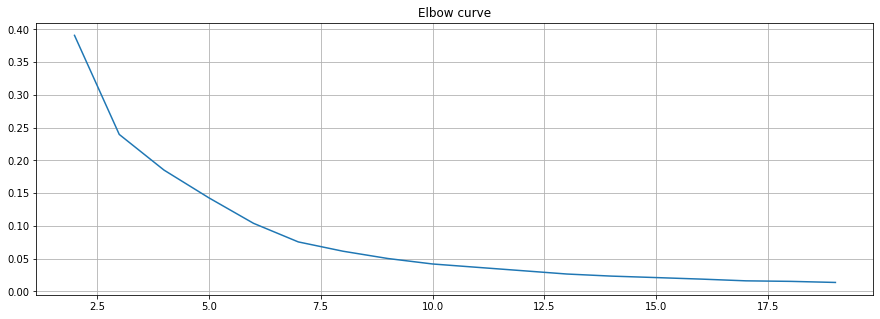

In [83]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

X = data
#Within cluster sum of square. This is distance between cenntroid and submission of all the point in cluster
WCSS = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    WCSS.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), WCSS)
plt.grid(True)
plt.title('Elbow curve')

**looking at the elbow, k value between 3 to 7 seems to be the optimal value**

For n_clusters = 2 The average silhouette_score is : 0.3812813756621382
For n_clusters = 3 The average silhouette_score is : 0.3867272075936054
For n_clusters = 4 The average silhouette_score is : 0.3700510709282256
For n_clusters = 5 The average silhouette_score is : 0.4029363071357833
For n_clusters = 6 The average silhouette_score is : 0.42147279820884326
For n_clusters = 7 The average silhouette_score is : 0.4372206953555971
For n_clusters = 8 The average silhouette_score is : 0.4071124794076791
For n_clusters = 9 The average silhouette_score is : 0.4192789255393793
For n_clusters = 10 The average silhouette_score is : 0.41686587242201895
For n_clusters = 11 The average silhouette_score is : 0.4341318822899896
For n_clusters = 12 The average silhouette_score is : 0.4243889079028157


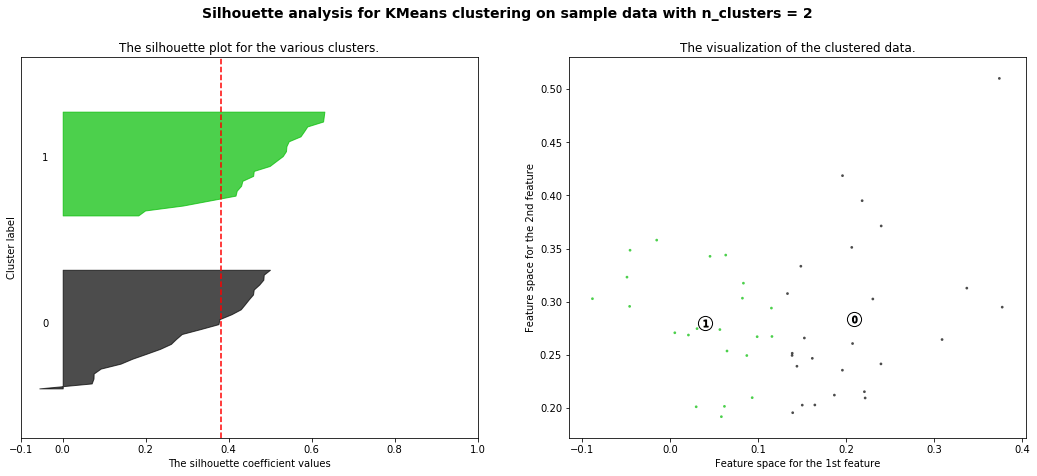

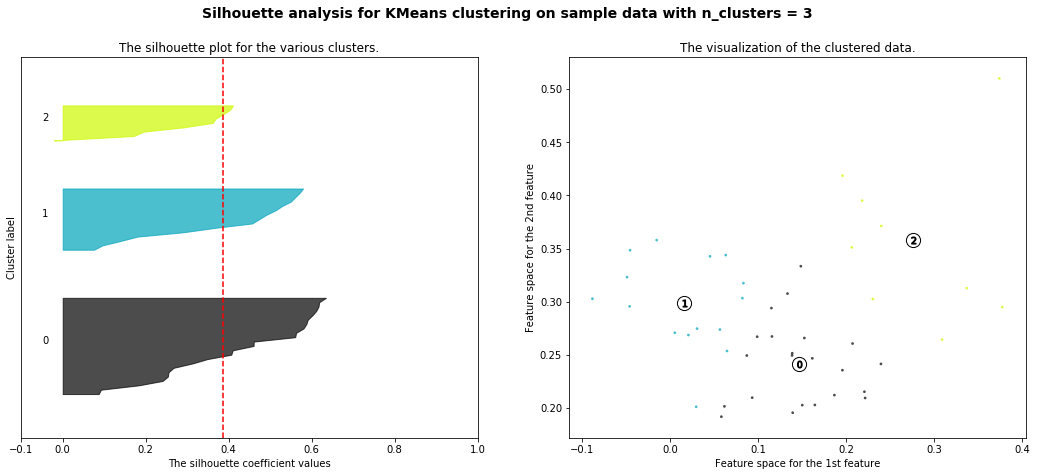

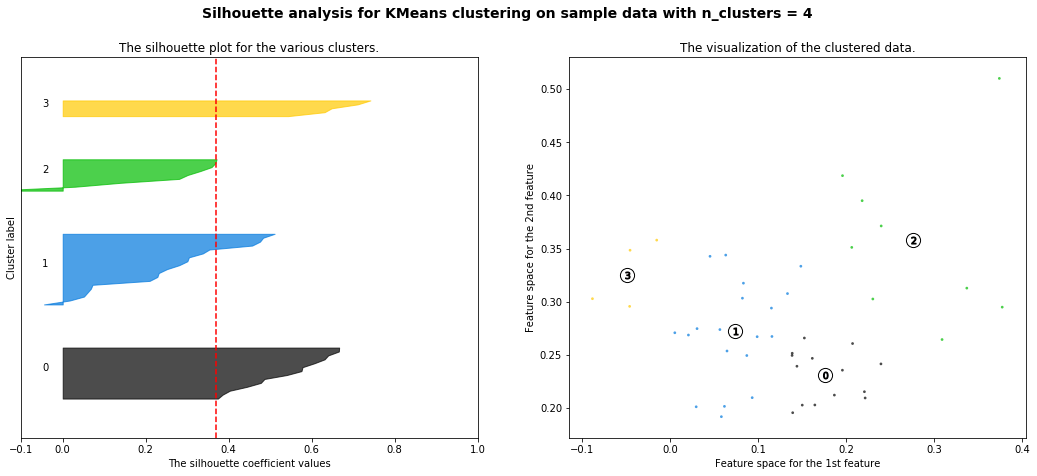

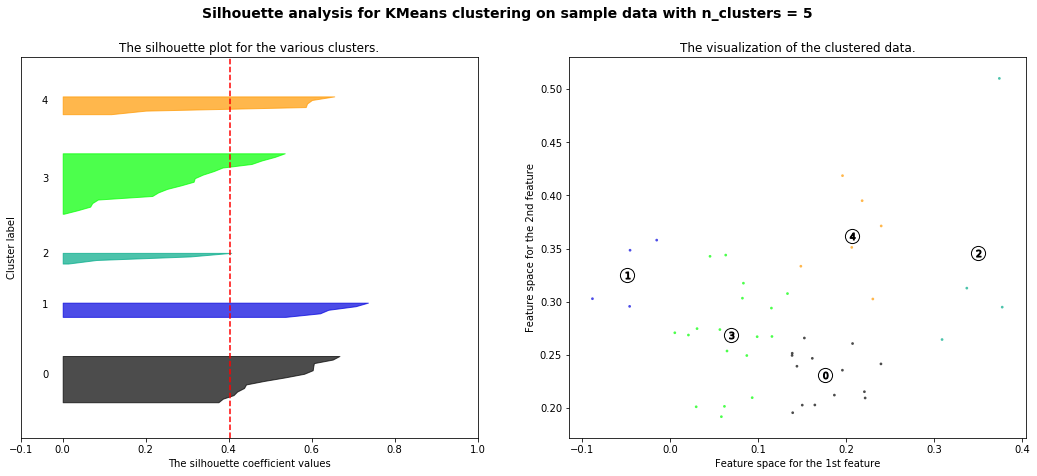

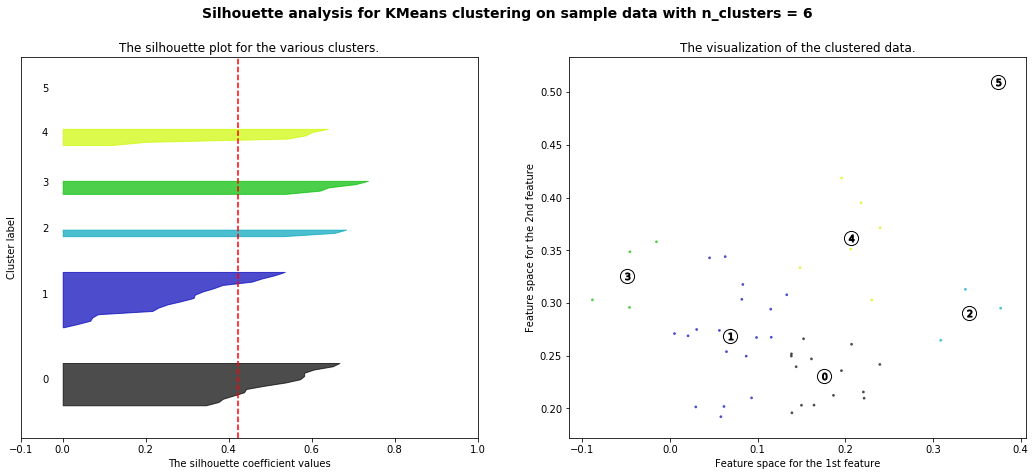

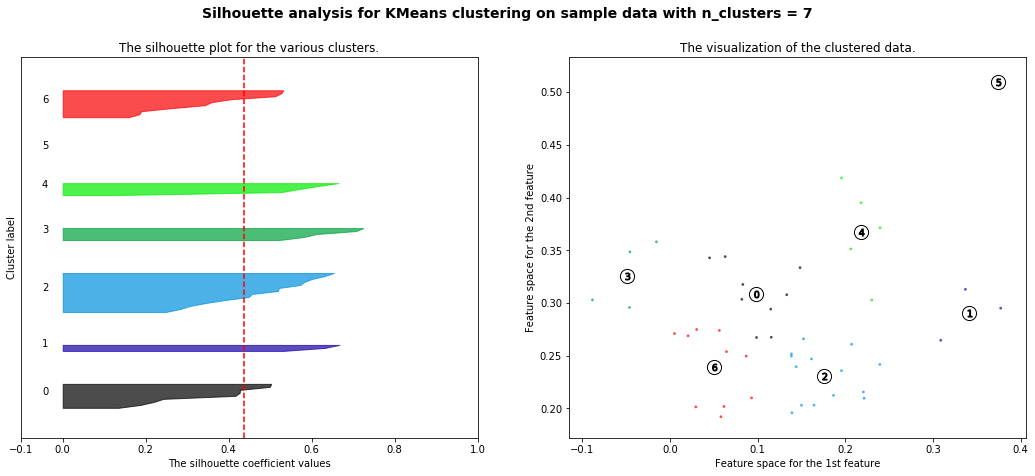

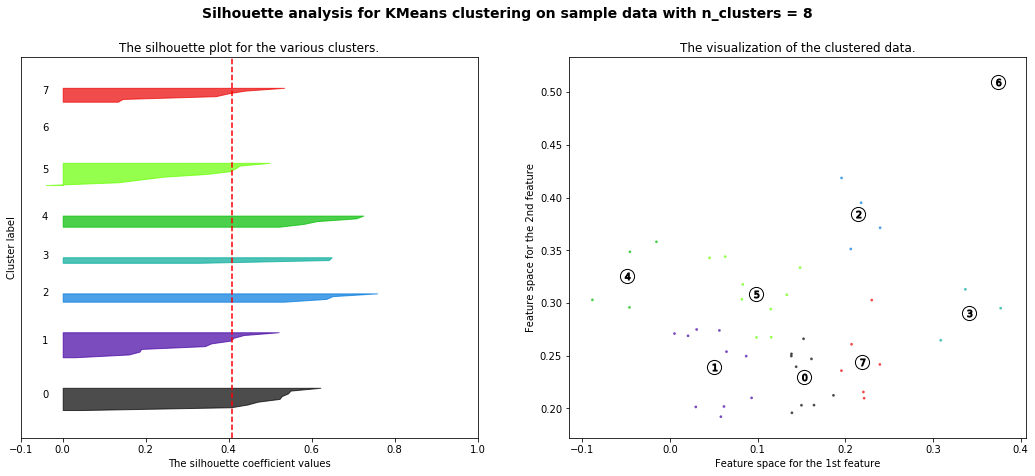

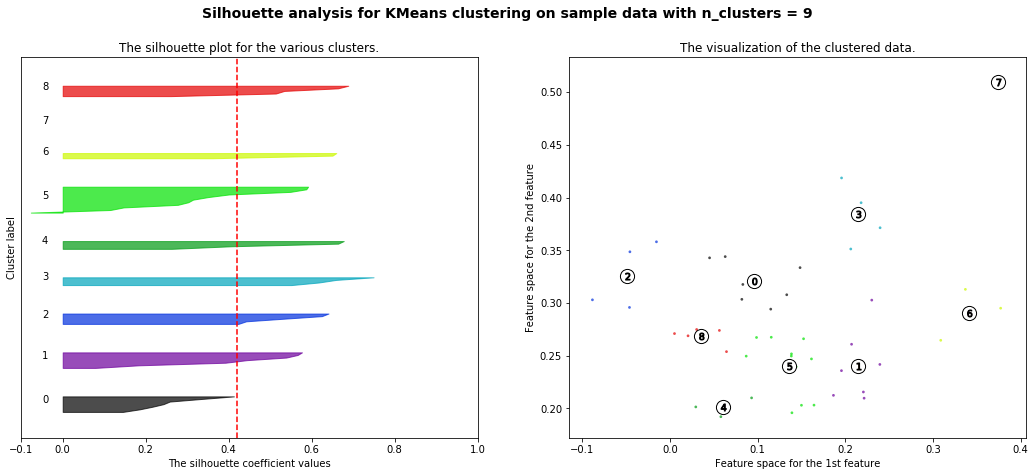

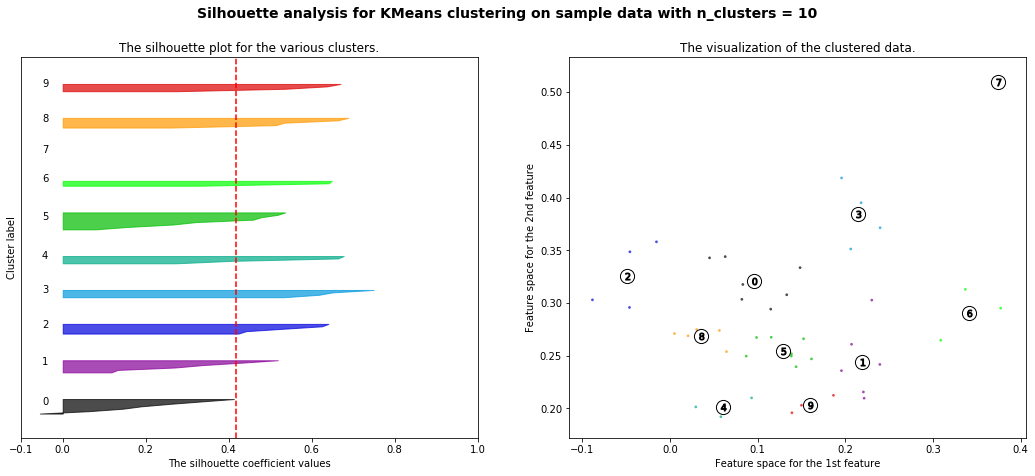

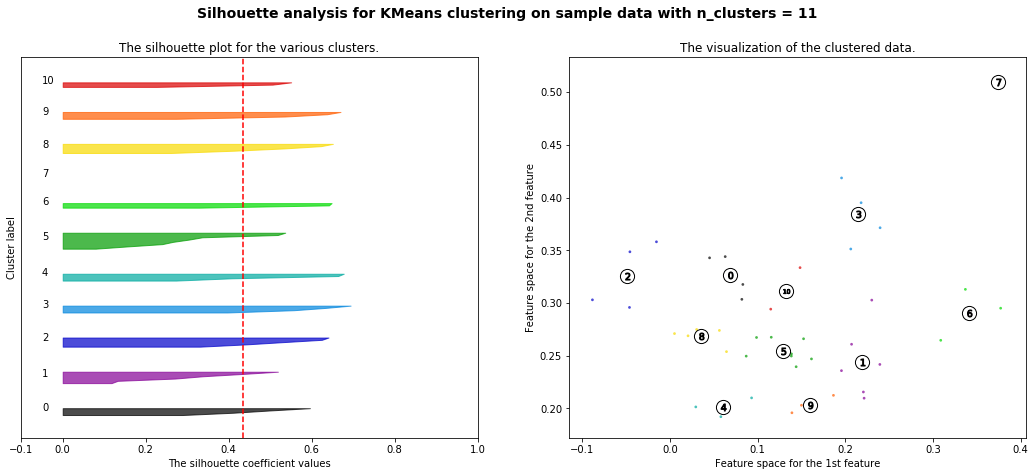

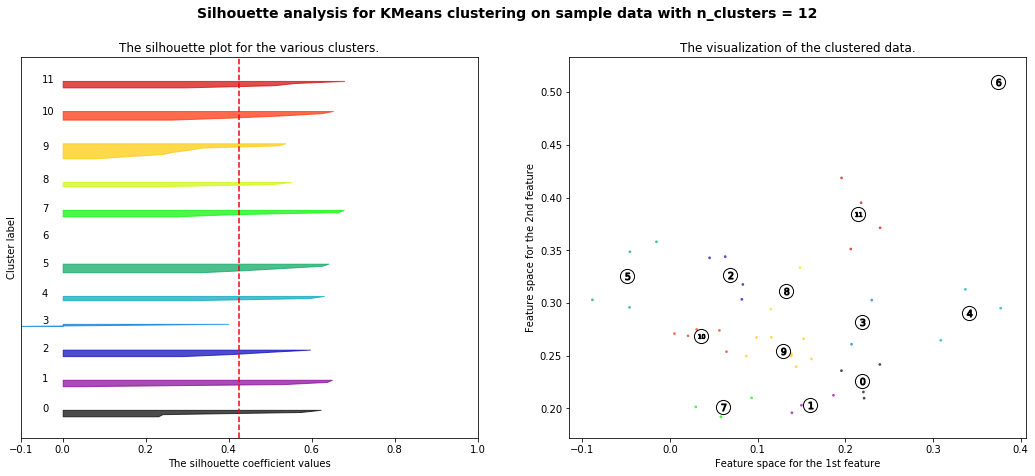

In [88]:
#lets validate the k value using silhouette

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


** we can see that the number of cluster can be 5,6 or 7 since there is no negative value as seen in the graph, i have choosed 7 as it has the best score**

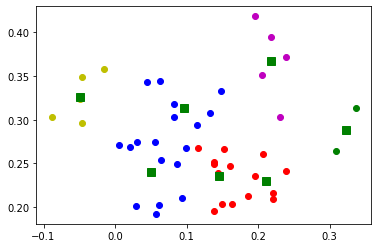

In [141]:
# computing K-Means with K = 7 (7 clusters)
centroids,_ = kmeans(data,7)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'or',
     data[idx==6,0],data[idx==6,1],'ob')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [123]:
#We can see there is an outlier, so either i can use density based clustering or remove the outlier. density based clustering is more robust to outliers
print(returns.idxmax())

Returns       ASML.AS
Volatility     LIN.DE
dtype: object


In [124]:
#drop the relevant stock from our data
returns.drop('ASML.AS',inplace=True)
returns.drop('LIN.DE',inplace=True)

In [125]:
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

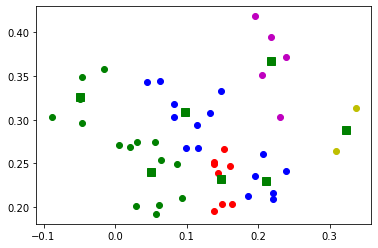

In [126]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,7)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'og',
     data[idx==6,0],data[idx==6,1],'ob')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [127]:
#lets see which ticker falls into which cluster
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('ADS.DE', 4)
('AD.AS', 3)
('AI.PA', 2)
('AIR.PA', 4)
('ALV.DE', 2)
('AMS.MC', 6)
('ABI.BR', 5)
('CS.PA', 3)
('BAS.DE', 3)
('BAYN.DE', 5)
('SAN.MC', 5)
('BMW.DE', 3)
('BNP.PA', 6)
('CRG.IR', 6)
('DAI.DE', 6)
('BN.PA', 3)
('DB1.DE', 0)
('DPW.DE', 2)
('DTE.DE', 3)
('ENEL.MI', 0)
('ENGI.PA', 6)
('ENI.MI', 5)
('EL.PA', 3)
('FLTR.IR', 4)
('IBE.MC', 0)
('ITX.MC', 3)
('IFX.DE', 4)
('INGA.AS', 5)
('ISP.MI', 6)
('KER.PA', 1)
('KNEBV.HE', 2)
('OR.PA', 0)
('MC.PA', 1)
('MUV2.DE', 2)
('RI.PA', 2)
('PHIA.AS', 2)
('SAF.PA', 4)
('SAN.PA', 3)
('SAP.DE', 6)
('SU.PA', 0)
('SIE.DE', 3)
('DG.PA', 6)
('VIV.PA', 2)
('VOW.DE', 6)
('VNA.DE', 0)
